In [119]:
import pandas as pd
from sklearn import model_selection, linear_model
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [197]:
cars = pd.read_csv('Cars93.csv')

In [199]:
cars.drop(columns = ['Unnamed: 0', 'Make'], inplace = True)

In [200]:
cars

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA


In [201]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [202]:
cars.dropna(axis = 0, subset = ['Rear.seat.room','Luggage.room'], inplace = True)

In [203]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        82 non-null     object 
 1   Model               82 non-null     object 
 2   Type                82 non-null     object 
 3   Min.Price           82 non-null     float64
 4   Price               82 non-null     float64
 5   Max.Price           82 non-null     float64
 6   MPG.city            82 non-null     int64  
 7   MPG.highway         82 non-null     int64  
 8   AirBags             82 non-null     object 
 9   DriveTrain          82 non-null     object 
 10  Cylinders           82 non-null     object 
 11  EngineSize          82 non-null     float64
 12  Horsepower          82 non-null     int64  
 13  RPM                 82 non-null     int64  
 14  Rev.per.mile        82 non-null     int64  
 15  Man.trans.avail     82 non-null     object 
 16  Fuel.tank.

In [204]:
cars.Cylinders = cars.Cylinders.astype('int64')

In [205]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        82 non-null     object 
 1   Model               82 non-null     object 
 2   Type                82 non-null     object 
 3   Min.Price           82 non-null     float64
 4   Price               82 non-null     float64
 5   Max.Price           82 non-null     float64
 6   MPG.city            82 non-null     int64  
 7   MPG.highway         82 non-null     int64  
 8   AirBags             82 non-null     object 
 9   DriveTrain          82 non-null     object 
 10  Cylinders           82 non-null     int64  
 11  EngineSize          82 non-null     float64
 12  Horsepower          82 non-null     int64  
 13  RPM                 82 non-null     int64  
 14  Rev.per.mile        82 non-null     int64  
 15  Man.trans.avail     82 non-null     object 
 16  Fuel.tank.

In [206]:
columns = [column for column in cars.columns if pd.api.types.is_object_dtype(cars[column])]
dummies_df = pd.get_dummies(cars, columns = columns, drop_first = True)

In [207]:
dummies_df

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,...,Type_Large,Type_Midsize,Type_Small,Type_Sporty,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Man.trans.avail_Yes,Origin_non-USA
0,12.9,15.9,18.8,25,31,4,1.8,140,6300,2890,...,0,0,1,0,0,1,1,0,1,1
1,29.2,33.9,38.7,18,25,6,3.2,200,5500,2335,...,0,1,0,0,0,0,1,0,1,1
2,25.9,29.1,32.3,20,26,6,2.8,172,5500,2280,...,0,0,0,0,1,0,1,0,1,1
3,30.8,37.7,44.6,19,26,6,2.8,172,5500,2535,...,0,1,0,0,0,0,1,0,1,1
4,23.7,30.0,36.2,22,30,4,3.5,208,5700,2545,...,0,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,8.7,9.1,9.5,25,33,4,1.8,81,5500,2550,...,0,0,1,0,0,1,1,0,1,1
89,17.6,20.0,22.4,21,30,4,2.0,134,5800,2685,...,0,0,0,0,0,1,1,0,1,1
90,22.9,23.3,23.7,18,25,6,2.8,178,5800,2385,...,0,0,0,1,0,1,1,0,1,1
91,21.8,22.7,23.5,21,28,4,2.3,114,5400,2215,...,0,0,0,0,1,0,0,1,1,1


In [208]:
y = dummies_df['MPG.highway']
x = dummies_df.drop(columns = 'MPG.highway')

In [209]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, random_state=0)

In [210]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [211]:
reg.score(X_train, y_train)

1.0

In [212]:
reg.score(X_test, y_test)

0.8955066155186687

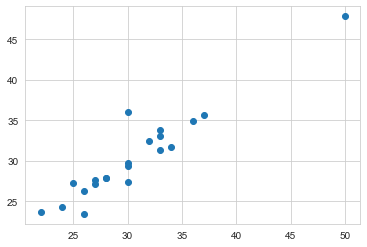

In [213]:
#sns.set_style('whitegrid')
plt.scatter(x=y_test,y=reg.predict(X_test))
# ax.set_xlabel('Weight')
# ax.set_ylabel('MPG (Highway)')
# line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'
# ax.plot(x, intercept + slope * x, label=line, color = 'r')
# ax.legend(facecolor='white')
# plt.show()

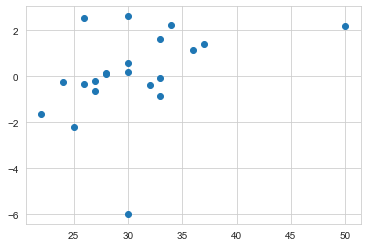

In [214]:
plt.scatter(x=y_test,y=y_test - reg.predict(X_test))